In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
from pymc3 import model_to_graphviz
plt.style.use("fivethirtyeight")

C:\Users\tanve\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\tanve\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


We will implement the eight schools problem from Section 5.5 in Gelman et al. 2013 and compare traditional methods vs. the new method proposed in the Vehtari et al. 2019 paper.

In this problem, the Educational Testing Services company studied the effects of coaching on SAT scores.

In [2]:
y = np.array([28,  8, -3,  7, -1,  1, 18, 12])
sigma = np.array([15, 10, 16, 11,  9, 11, 10, 18])

In [5]:
with pm.Model() as hierarchical:

    mu = pm.Normal('mu', 0, 5)
    tau = pm.Cauchy('tau', 0, 5)

    theta = pm.Normal('theta', mu, tau, shape = len(y))
    obs = pm.Normal('obs', theta, sigma=sigma, observed=y)

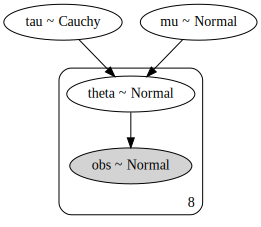

In [6]:
model_to_graphviz(hierarchical)

In [11]:
with hierarchical:
    trace = pm.sample(1000, cores=1, chains = 4, target_accept = 0.97)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [theta, tau, mu]
100%|██████████| 1500/1500 [00:50<00:00, 29.55it/s]
There were 86 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8196660563924111, but should be close to 0.97. Try to increase the number of tuning steps.
There were 97 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8637389701117527, but should be close to 0.97. Try to increase the number of tuning steps.
There were 110 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8892538096181115, but should be close to 0.97. Try to increase the number of tuning steps.
There were 117 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptan

In [12]:
pm.save_trace(trace = trace)

'.pymc_1.trace'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5FBA2AEF0>,
      dtype=object)

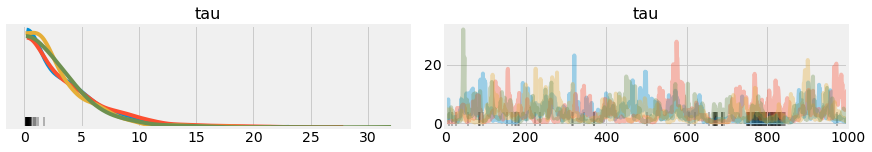

In [19]:
pm.traceplot(trace, var_names=['tau'])

In [24]:
trace

<MultiTrace: 4 chains, 1000 iterations, 3 variables>

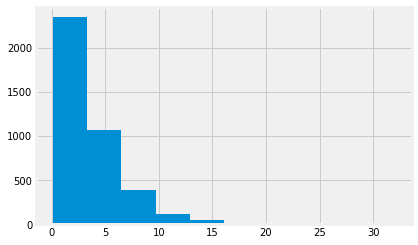

In [26]:
plt.hist(trace['tau']);

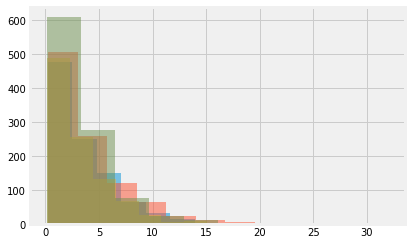

In [49]:
traces_by_chain = np.array(trace.get_values('tau', combine = False))
for i in range(0, 4):
    plt.hist(traces_by_chain[i], alpha = 0.5);

In [54]:
tmpx = np.random.randint(10, size = 5)
tmpx

array([0, 4, 9, 5, 2])

In [ ]:
def r_scale(x):
    S = len(x)
    

r_scale <- function(x) {
  S <- length(x)
  r <- rank(x, ties.method = 'average')
  if (!is.null(dim(x))) {
    # output should have the input dimension
    r <- array(r, dim = dim(x), dimnames = dimnames(x))
  }
  r
}